In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
import numpy as np
import edhec_risk_kit as erk

# Monte Carlo Simulation

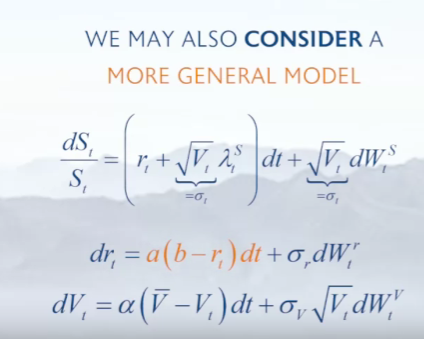

Assuming a mean-reverting model for interest rates, what happens when the current interest rate value is below the long-term mean value?

When interest rate is below its long-term mean value, it tends to go back up to the long-term mean value on average, with an intensity which is proportional to the speed of mean-reversion.

Question
Assuming a mean-reverting model for interest rates with long-term mean level equal to 2%. If the current level of interest rate is 3% and if the speed of mean reversion is 0.5, what is the average annual expected change in interest rate?

A: The expected change in interest rate is given by 0.5x(1%-2%)=-0.5%.     

# Lab Session-Random Walks and Monte Carlo

Recall that the stochastic model for asset returns is given by the Geometric Brownian Motion process:

$$ \frac{S_{t+dt}-S_t}{S_t} = \mu dt + \sigma\sqrt{dt}\xi_t $$

In [11]:
import numpy as np
import pandas as pd

def gbm(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of a Stock Price using a Geometric Brownian Motion Model
    """
    #delta time
    dt= 1/steps_per_year
    n_steps= int(n_years*steps_per_year)
    # Psi is the random
    xi=np.random.normal(size=(n_steps, n_scenarios))
    rets=mu*dt + sigma*np.sqrt(dt)*xi
    rets = pd.DataFrame(rets)
    # to prices
    prices= s_0*(1+rets).cumprod()
    return prices

In [21]:
p=gbm(10,n_scenarios=3)

In [16]:
p.shape

(120, 3)

In [22]:
p.head()

,0,1,2
0,96.986640,95.518176,94.359999
1,96.956258,93.425943,98.526534
2,97.973786,94.335436,102.325677
3,103.352590,95.774758,96.111313
4,98.836674,89.876498,101.002993


<Axes: >

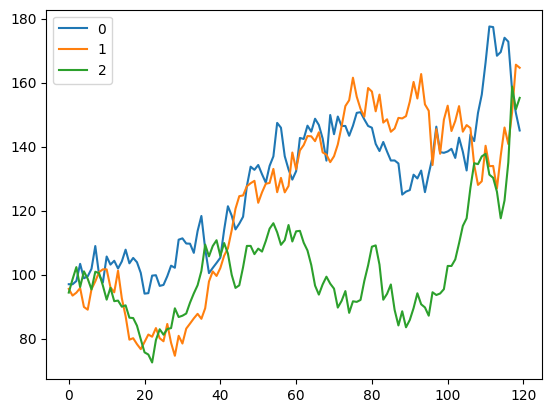

In [23]:
p.plot()

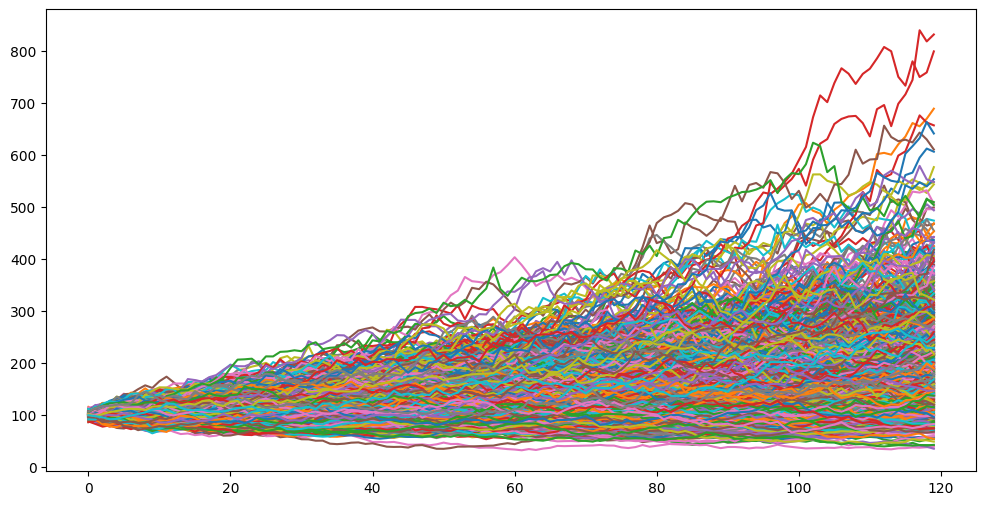

In [27]:
p=gbm(n_years=10, n_scenarios=1000).plot(figsize=(12,6), legend=False)

In [28]:
import numpy as np
import pandas as pd

def gbm0(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of a Stock Price using a Geometric Brownian Motion Model
    """
    #delta time
    dt= 1/steps_per_year
    n_steps= int(n_years*steps_per_year)
    # Psi is the random
    xi=np.random.normal(size=(n_steps, n_scenarios))
    rets=mu*dt + sigma*np.sqrt(dt)*xi
    rets = pd.DataFrame(rets)
    # to prices
    prices= s_0*(1+rets).cumprod()
    return prices


#rewrite the above model, be more efficient, avoiding loops in model.
def gbm1(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of a Stock Price using a Geometric Brownian Motion Model
    """
    #delta time
    dt= 1/steps_per_year
    n_steps= int(n_years*steps_per_year)
    # Psi is the random
    rets_plus_1=np.random.normal(loc=(mu*dt) ,scale=(sigma*np.sqrt(dt)) ,size=(n_steps, n_scenarios))
    # to prices
    prices= s_0*pd.DataFrame(rets_plus_1).cumprod()
    return prices

In [29]:
%timeit gbm(n_years=5, n_scenarios=1000)

1.8 ms ± 29.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [30]:
%timeit gbm1(n_years=5, n_scenarios=1000)

1.6 ms ± 31.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


<Axes: >

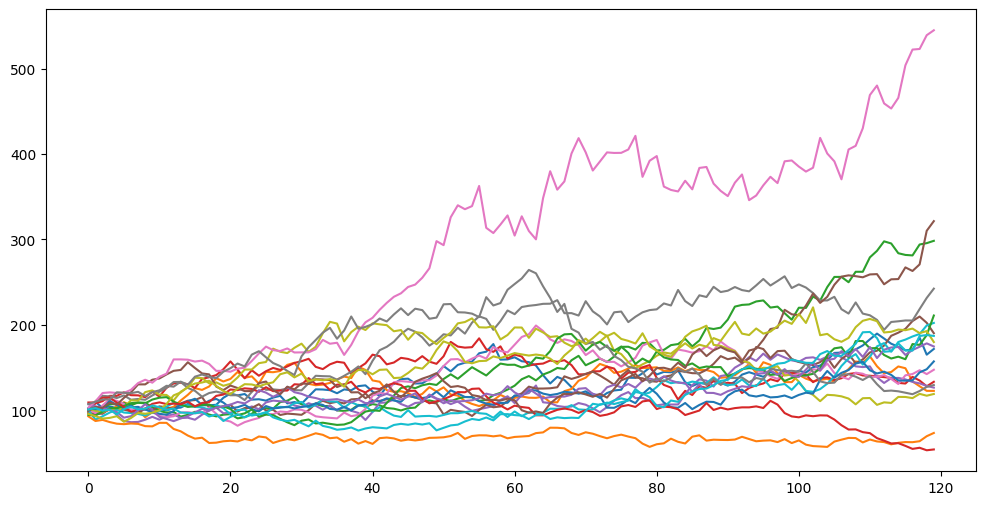

In [36]:
gbm(n_years=10, n_scenarios=20).plot(legend=False,figsize=(12,6))

In [37]:
def gbm(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of a Stock Price using a Geometric Brownian Motion Model
    """
    #delta time
    dt= 1/steps_per_year
    n_steps= int(n_years*steps_per_year)
    # Psi is the random
    rets_plus_1=np.random.normal(loc=(mu*dt) ,scale=(sigma*np.sqrt(dt)) ,size=(n_steps, n_scenarios))
    rets_plus_1[0]=1
    # to prices
    prices= s_0*pd.DataFrame(rets_plus_1).cumprod()
    return prices

In [42]:
gbm(n_scenarios=10).head()

,0,1,2,3,4,5,6,7,8,9
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,1.413044,-2.218847,7.166851,-0.852963,5.223115,-6.645519,-5.053343,6.255126,1.916709,0.784847
2,0.022379,-0.039816,-0.164198,-0.013769,-0.133135,0.320092,0.274420,-0.152653,0.032523,0.010077
3,0.002414,-0.000308,-0.010092,0.000604,-0.001469,0.008215,-0.001886,0.005027,0.000653,-0.000412
4,-0.000095,-0.000005,-0.000084,0.000007,-0.000054,-0.000155,-0.000062,-0.000348,-0.000010,0.000011


#Analyzing CPPI strategies

u(mu) parameter: can impact the drift of the trend
sigma parameter: volatility of each scenario could be large, expanding the possible outcomes.
